In [23]:
import seaborn as sbs 
import numpy as np 
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
file_path = r'C:\Users\EMNA\Desktop\Numerisation.xlsx'
df = pd.read_excel(file_path)

In [27]:
print(df.head())

   ID  Gender  Current_Status  Family_Situation  Relationship_Status  \
0   1       1               0                 1                    1   
1   2       1               0                 0                    1   
2   3       0               1                 0                    3   
3   4       1               0                 0                    1   
4   5       1               0                 0                    3   

   Study_Cycle  Year _of _Study  family_history  mood_swings  organisation  \
0            3                2               1            1             1   
1            3                1               1            1             1   
2            3                2               1            1             0   
3            3                1               0            1             0   
4            0                3               0            1             0   

   ...  concentration  Memory  Decision-making  negatif_thoughts  \
0  ...              1       1 

In [29]:
df = df.drop(columns=['ID', 'conso_substance'])

In [31]:
print(df.head())

   Gender  Current_Status  Family_Situation  Relationship_Status  Study_Cycle  \
0       1               0                 1                    1            3   
1       1               0                 0                    1            3   
2       0               1                 0                    3            3   
3       1               0                 0                    1            3   
4       1               0                 0                    3            0   

   Year _of _Study  family_history  mood_swings  organisation  \
0                2               1            1             1   
1                1               1            1             1   
2                2               1            1             0   
3                1               0            1             0   
4                3               0            1             0   

   Self-Satisfaction  ...  concentration  Memory  Decision-making  \
0                  1  ...              1       1     

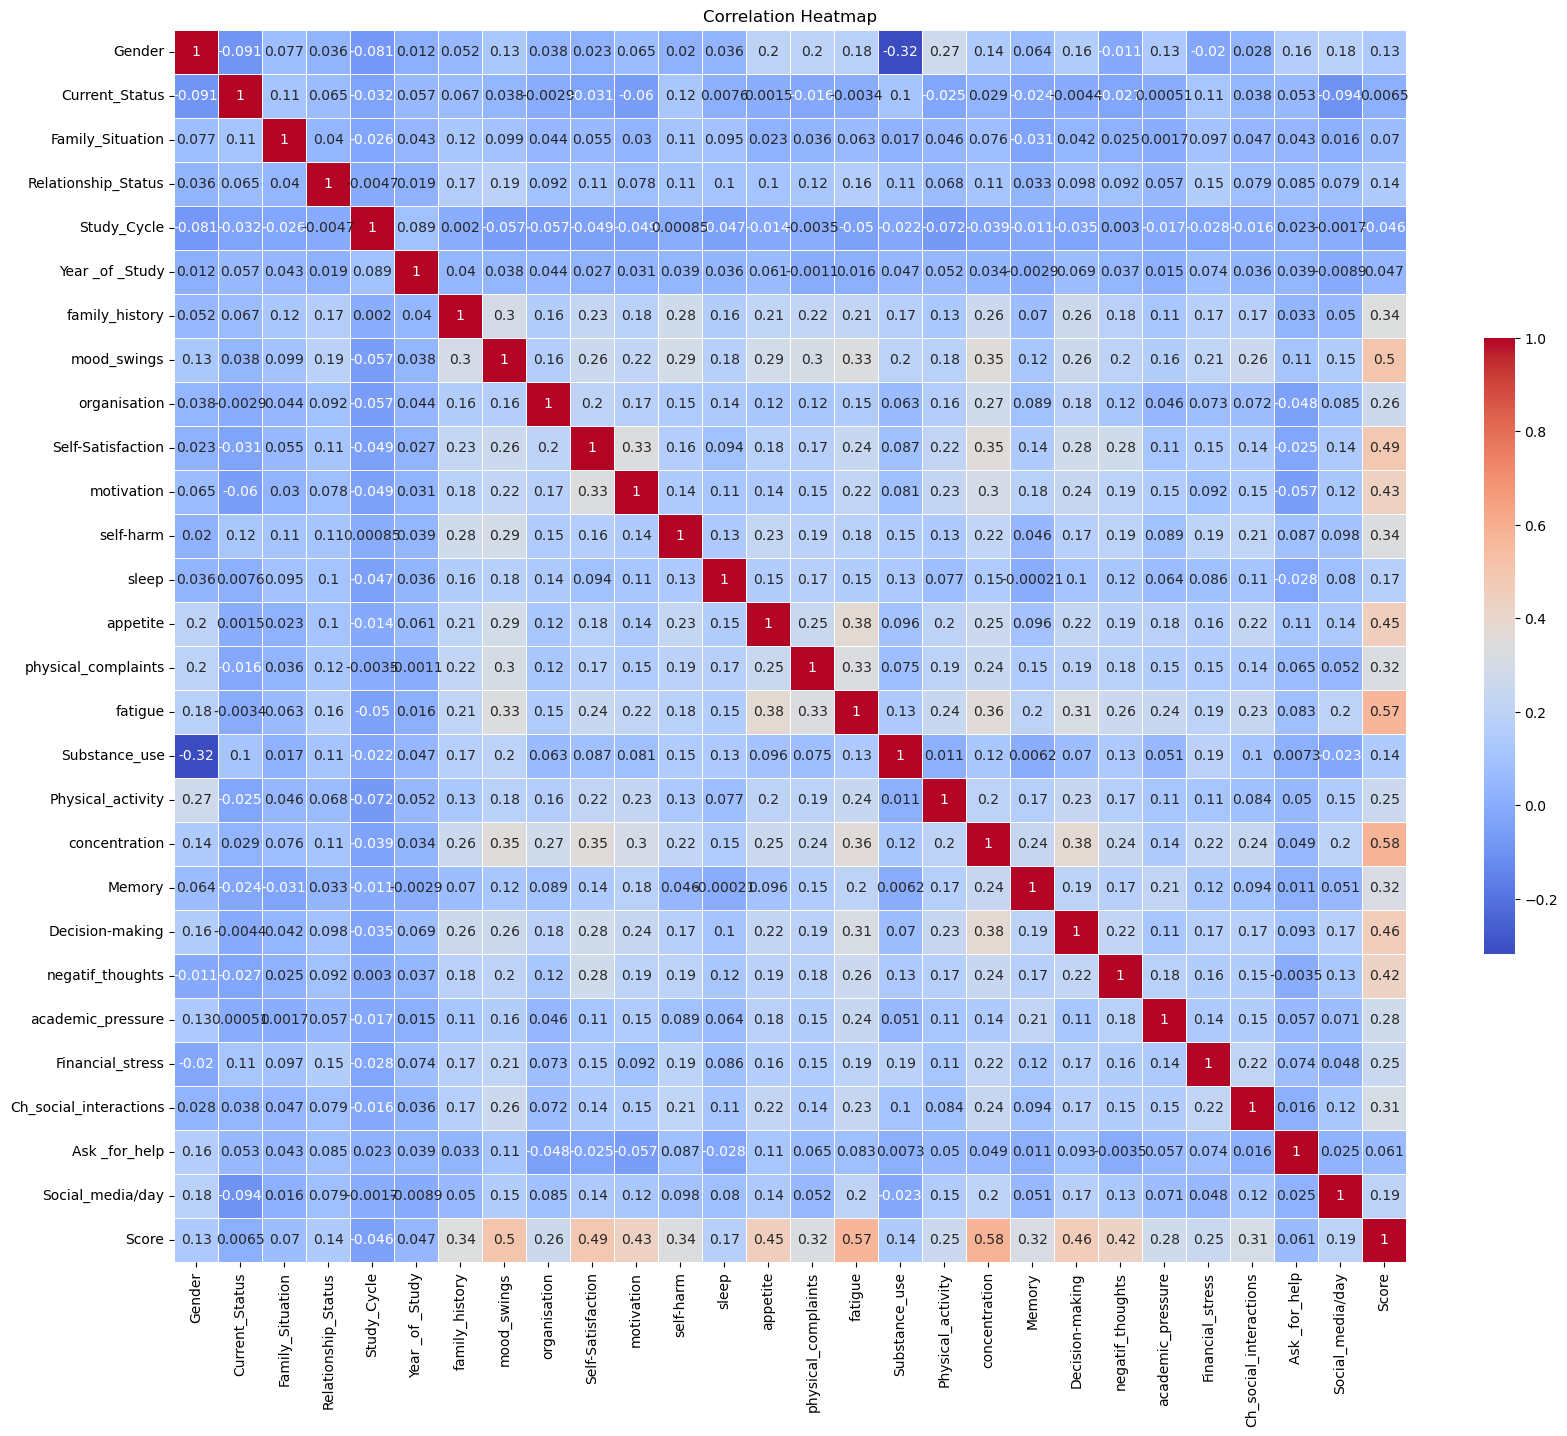

In [33]:
corr = df.corr()
plt.figure(figsize=(20, 16))
sbs.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

In [35]:
selected_features = [
    'self-harm', 'negatif_thoughts', 'sleep', 'fatigue', 
    'academic_pressure', 'concentration', 'Year _of _Study', 'family_history'
]


In [37]:
X = df[selected_features]
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [43]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Cross-Validated Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation of Cross-Validated Accuracy: {:.4f}".format(np.std(cv_scores)))

Cross-Validated Accuracy Scores: [0.90816327 0.84693878 0.80612245 0.84693878 0.85714286 0.84693878
 0.87628866 0.83505155 0.84536082 0.91752577]
Mean Cross-Validated Accuracy: 0.8586
Standard Deviation of Cross-Validated Accuracy: 0.0318


In [63]:
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        78
           1       0.92      0.90      0.91       166

    accuracy                           0.88       244
   macro avg       0.86      0.87      0.86       244
weighted avg       0.88      0.88      0.88       244


Confusion Matrix on Test Set:
[[ 65  13]
 [ 17 149]]


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8770


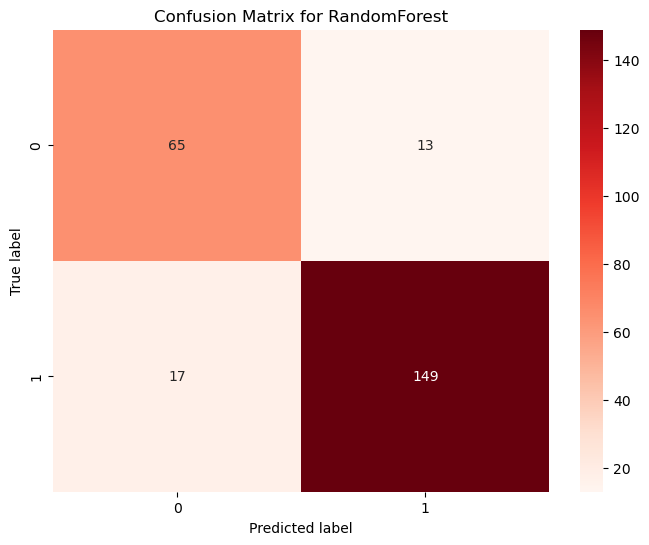

In [59]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sbs.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for RandomForest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [53]:
def compute_cv_metrics(rf_model, X, y, kf):
    metrics = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']
    results = {}
    
    for metric in metrics:
        cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=metric)
        results[metric] = {
            'mean': np.mean(cv_scores),
            'std': np.std(cv_scores),
            'scores': cv_scores
        }
        print(f"{metric.capitalize()} Scores: {cv_scores}")
        print(f"Mean {metric.capitalize()}: {np.mean(cv_scores):.4f}")
        print(f"Standard Deviation of {metric.capitalize()}: {np.std(cv_scores):.4f}\n")
    
    return results

In [55]:
cv_results = compute_cv_metrics(rf_model, X, y, kf)

y_pred_cv = cross_val_predict(rf_model, X, y, cv=kf)
print("\nConfusion Matrix (Cross-Validation Predictions):\n", confusion_matrix(y, y_pred_cv))
print("\nClassification Report (Cross-Validation Predictions):\n", classification_report(y, y_pred_cv))

Precision Scores: [0.925      0.85555556 0.8452381  0.85882353 0.85869565 0.91666667
 0.87209302 0.88764045 0.875      0.92771084]
Mean Precision: 0.8822
Standard Deviation of Precision: 0.0291

Recall Scores: [0.88095238 0.91666667 0.85542169 0.87951807 0.95180723 0.92771084
 0.90361446 0.95180723 0.84337349 0.92771084]
Mean Recall: 0.9039
Standard Deviation of Recall: 0.0361

F1 Scores: [0.90243902 0.88505747 0.8502994  0.86904762 0.90285714 0.92215569
 0.88757396 0.91860465 0.85889571 0.92771084]
Mean F1: 0.8925
Standard Deviation of F1: 0.0256

Accuracy Scores: [0.86885246 0.83606557 0.79508197 0.81967213 0.86065574 0.89344262
 0.8442623  0.8852459  0.81147541 0.90163934]
Mean Accuracy: 0.8516
Standard Deviation of Accuracy: 0.0345

Roc_auc Scores: [0.94329574 0.91713659 0.90206982 0.92199568 0.93697868 0.96462774
 0.92848316 0.92879209 0.89928947 0.95288848]
Mean Roc_auc: 0.9296
Standard Deviation of Roc_auc: 0.0198


Confusion Matrix (Cross-Validation Predictions):
 [[287 101]
 [